In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
df = pd.read_csv("./Customer-Churn-Records.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


## Removing the Rows that are not needed and will adversely affect the model's generalisation.
The columns RowNumber, CustomerId and Suurname are irrelevant for predicting whether the customer will continue or not 

In [3]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1, inplace = True)

In [4]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


# Data Sainitation and EDA 

In [5]:
df.isnull().sum()

CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

There are no null values so we do not need to do any imputation...<br>
We can continue with EDA

In [6]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Geography           10000 non-null  object 
 2   Gender              10000 non-null  object 
 3   Age                 10000 non-null  int64  
 4   Tenure              10000 non-null  int64  
 5   Balance             10000 non-null  float64
 6   NumOfProducts       10000 non-null  int64  
 7   HasCrCard           10000 non-null  int64  
 8   IsActiveMember      10000 non-null  int64  
 9   EstimatedSalary     10000 non-null  float64
 10  Exited              10000 non-null  int64  
 11  Complain            10000 non-null  int64  
 12  Satisfaction Score  10000 non-null  int64  
 13  Card Type           10000 non-null  object 
 14  Point Earned        10000 non-null  int64  
dtypes: float64(2), int64(10), object(3)
memory usage: 1.1+

C:\Users\KIIT\AppData\Local\Temp\ipykernel_17108\1057287356.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


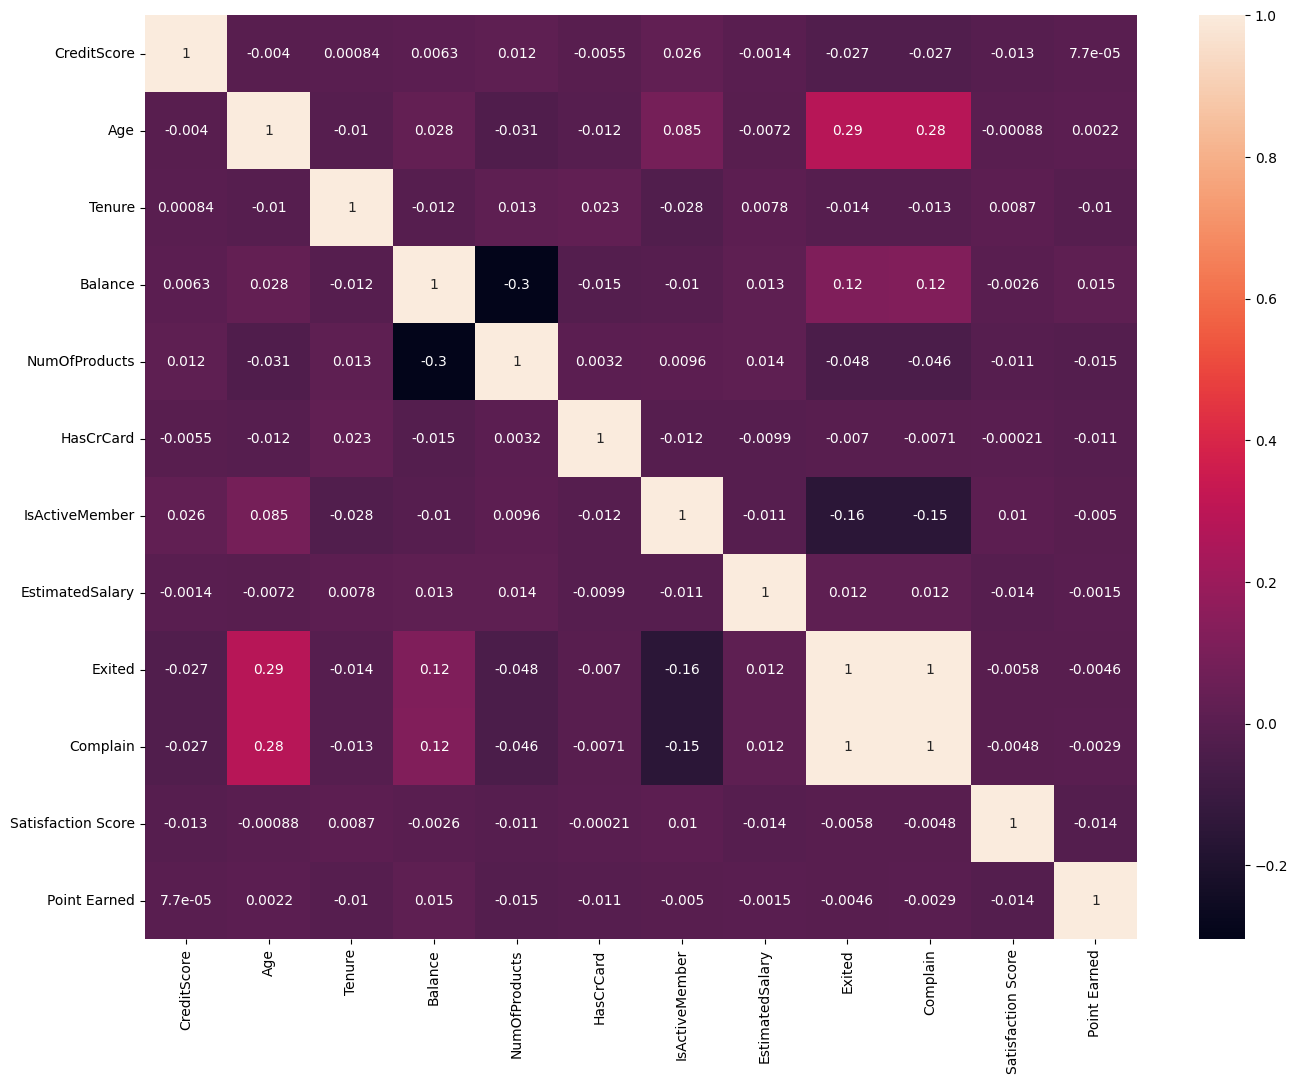

In [8]:
plt.figure(figsize=(16, 12))
sns.heatmap(df.corr(), annot = True)
plt.show()

The key takeaway from this correlation matrix is that the customers who have exited had filed a complain before exiting ad so there is a linear relatinship b/w the two columns.


### Mean points earned by each card group

In [9]:
print(df.groupby("Card Type")["Point Earned"].mean())

Card Type
DIAMOND     605.983646
GOLD        607.235811
PLATINUM    608.839679
SILVER      604.002804
Name: Point Earned, dtype: float64


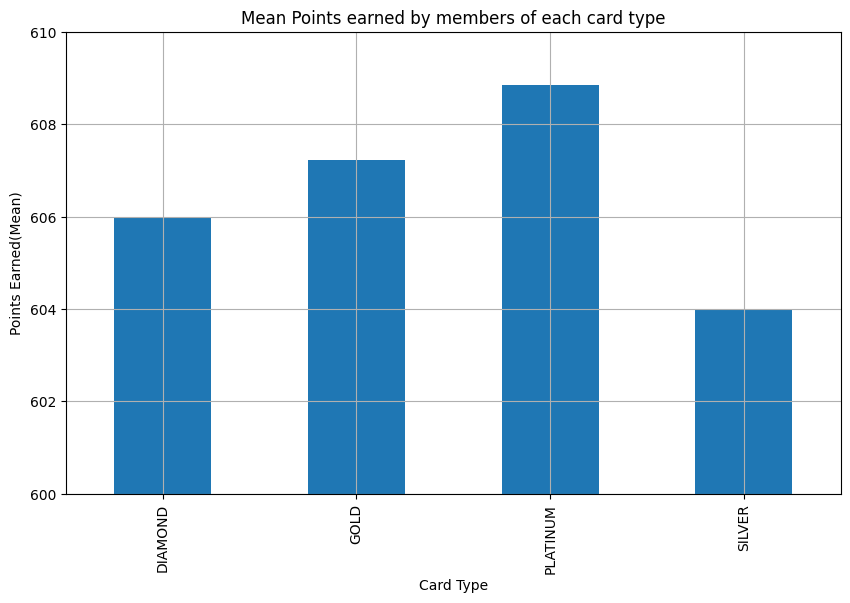

In [10]:
df.groupby("Card Type")["Point Earned"].mean().plot(kind="bar", figsize=(10, 6))
plt.title("Mean Points earned by members of each card type")
plt.ylim(600, 610)
plt.xlabel("Card Type")
plt.ylabel("Points Earned(Mean)")
plt.grid(True)
plt.show()

### Mean Satisfaction of each card group

In [11]:
print(df.groupby("Card Type")["Satisfaction Score"].mean())

Card Type
DIAMOND     2.993618
GOLD        3.044365
PLATINUM    3.010020
SILVER      3.007212
Name: Satisfaction Score, dtype: float64


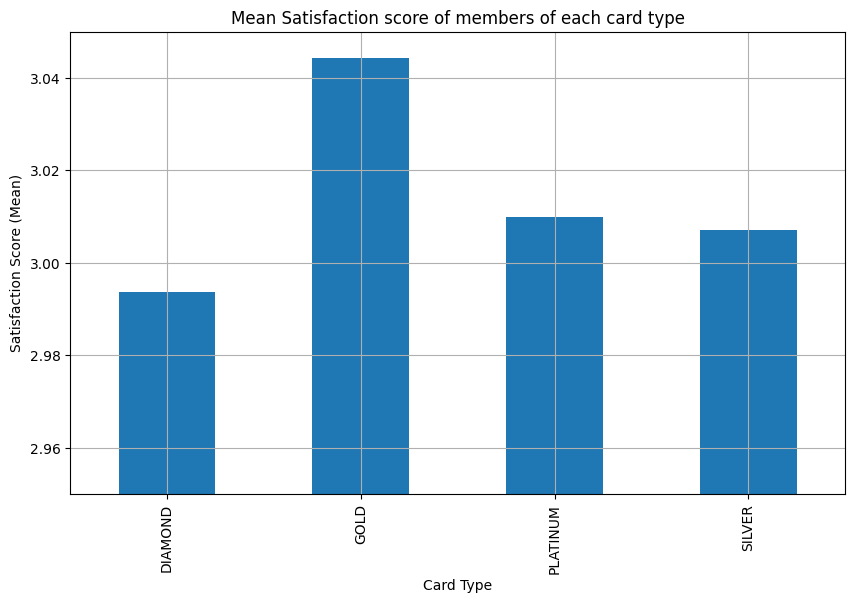

In [12]:
df.groupby("Card Type")["Satisfaction Score"].mean().plot(kind="bar", figsize=(10, 6))
plt.title("Mean Satisfaction score of members of each card type")
plt.ylim(2.95, 3.05)
plt.xlabel("Card Type")
plt.ylabel("Satisfaction Score (Mean)")
plt.grid(True)
plt.show()

### Mean Balance by each card group

In [13]:
print(df.groupby("Card Type")["Balance"].mean())

Card Type
DIAMOND     79120.017156
GOLD        76695.362042
PLATINUM    75692.707623
SILVER      74423.040272
Name: Balance, dtype: float64


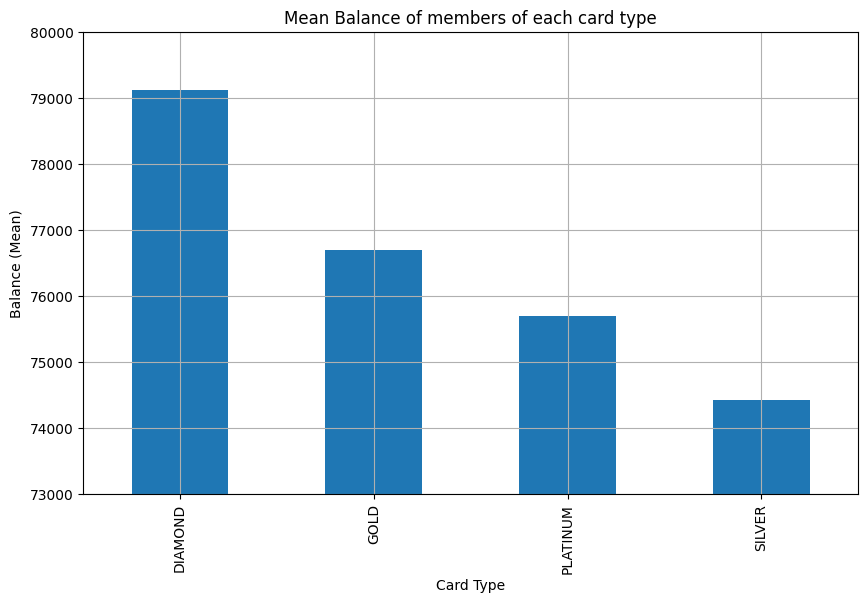

In [14]:
df.groupby("Card Type")["Balance"].mean().plot(kind="bar", figsize=(10, 6))
plt.title("Mean Balance of members of each card type")
plt.ylim(73000, 80000)
plt.xlabel("Card Type")
plt.ylabel("Balance (Mean)")
plt.grid(True)
plt.show()

### Mean Earning by each card group

In [15]:
print(df.groupby("Card Type")["EstimatedSalary"].mean())

Card Type
DIAMOND      98525.763359
GOLD        100550.959480
PLATINUM    100197.544786
SILVER      101092.522119
Name: EstimatedSalary, dtype: float64


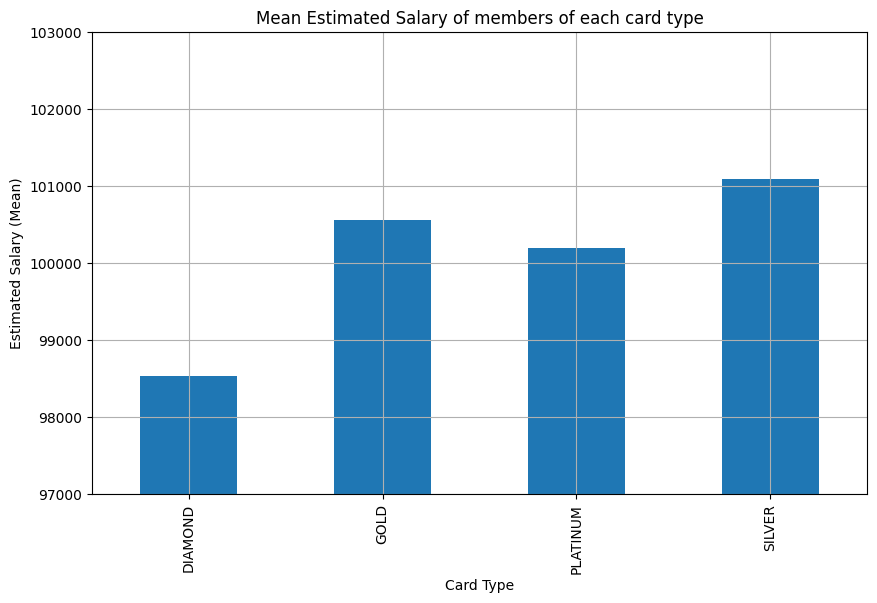

In [16]:
df.groupby("Card Type")["EstimatedSalary"].mean().plot(kind="bar", figsize=(10, 6))
plt.title("Mean Estimated Salary of members of each card type")
plt.ylim(97000, 103000)
plt.xlabel("Card Type")
plt.ylabel("Estimated Salary (Mean)")
plt.grid(True)
plt.show()

### From the above 2 graphs it is evident that members having better cards have a higher balance / limt of their credit card despite having a lower mean salary. This means The limit/balance is highly dependent on the card type

### Mean Age by each card group

In [17]:
print(df.groupby("Card Type")["Age"].mean())

Card Type
DIAMOND     38.991225
GOLD        38.938449
PLATINUM    39.008016
SILVER      38.749199
Name: Age, dtype: float64


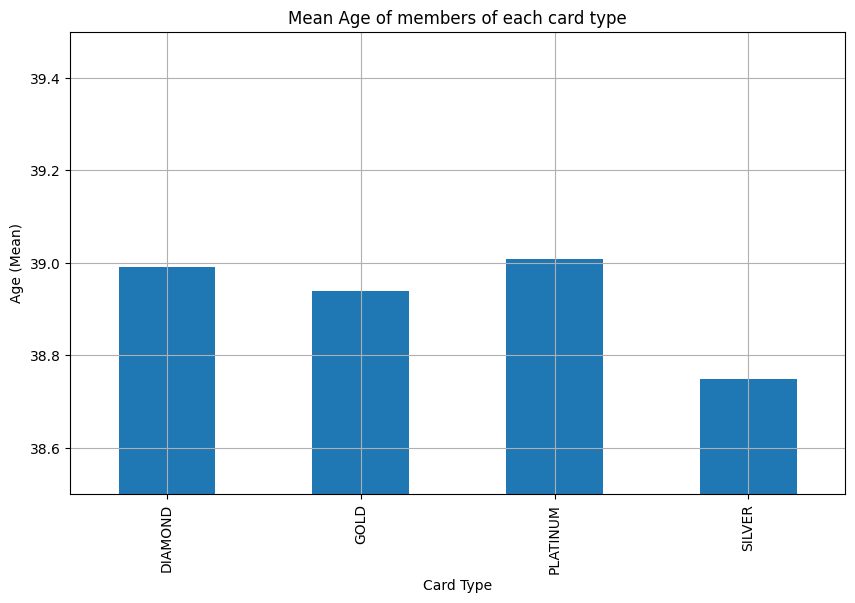

In [18]:
df.groupby("Card Type")["Age"].mean().plot(kind="bar", figsize=(10, 6))
plt.title("Mean Age of members of each card type")
plt.ylim(38.5, 39.5)
plt.xlabel("Card Type")
plt.ylabel("Age (Mean)")
plt.grid(True)
plt.show()

### This means that the mean age of the population is around 39 years and people of all any age can have any kind of card.

### Mean Credit Score by each card group

In [19]:
print(df.groupby("Card Type")["CreditScore"].mean())

Card Type
DIAMOND     651.072996
GOLD        652.342526
PLATINUM    648.255311
SILVER      650.436699
Name: CreditScore, dtype: float64


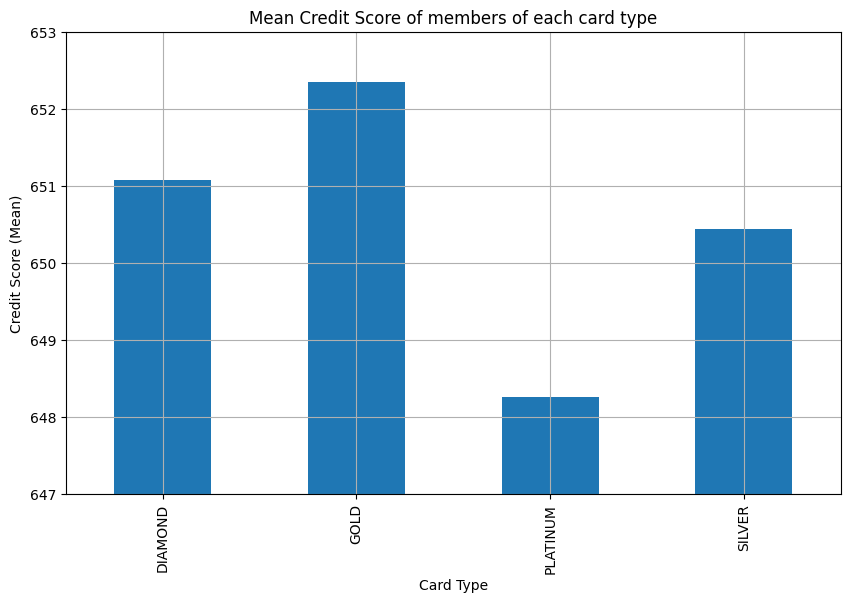

In [20]:
df.groupby("Card Type")["CreditScore"].mean().plot(kind="bar", figsize=(10, 6))
plt.title("Mean Credit Score of members of each card type")
plt.ylim(647, 653)
plt.xlabel("Card Type")
plt.ylabel("Credit Score (Mean)")
plt.grid(True)
plt.show()

### Card Type distribution by geographies

In [21]:
print(df.groupby(["Geography", "Card Type"])["CreditScore"].mean())

Geography  Card Type
France     DIAMOND      653.810569
           GOLD         646.292308
           PLATINUM     644.992880
           SILVER       653.547082
Germany    DIAMOND      647.174383
           GOLD         658.676876
           PLATINUM     651.580592
           SILVER       648.085000
Spain      DIAMOND      649.736089
           GOLD         657.775244
           PLATINUM     651.629213
           SILVER       646.204583
Name: CreditScore, dtype: float64


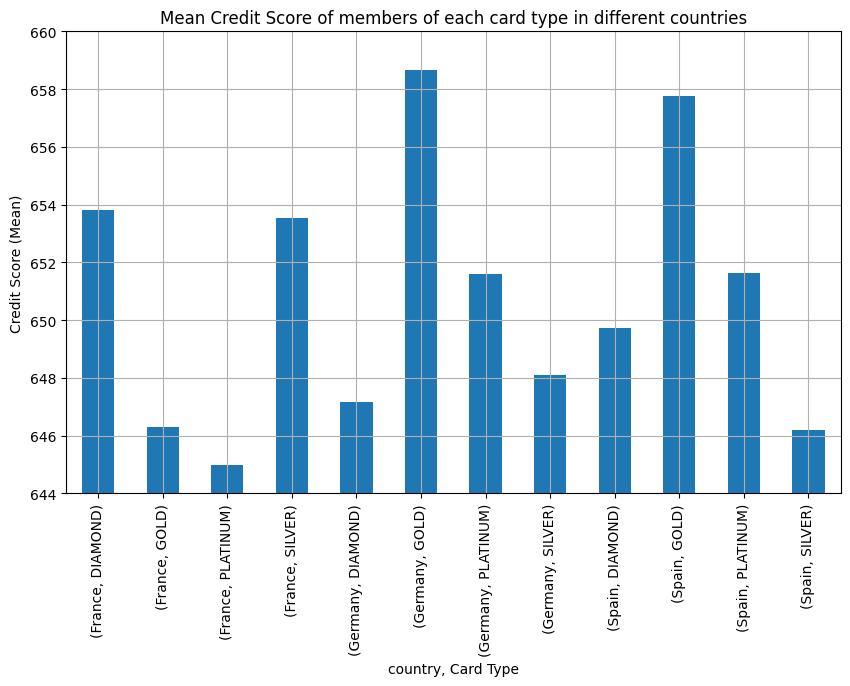

In [22]:
df.groupby(["Geography", "Card Type"])["CreditScore"].mean().plot(kind="bar", figsize=(10, 6))
plt.title("Mean Credit Score of members of each card type in different countries")
plt.ylim(644, 660)
plt.xlabel("country, Card Type")
plt.ylabel("Credit Score (Mean)")
plt.grid(True)
plt.show()

### Number of different types of cards issued in different countries

In [23]:
print(df.groupby(["Geography", "Card Type"])["Card Type"].count())

Geography  Card Type
France     DIAMOND      1230
           GOLD         1235
           PLATINUM     1264
           SILVER       1285
Germany    DIAMOND       648
           GOLD          653
           PLATINUM      608
           SILVER        600
Spain      DIAMOND       629
           GOLD          614
           PLATINUM      623
           SILVER        611
Name: Card Type, dtype: int64


### Satisfaction of different types of card users in different countries

In [24]:
satisfaction_by_country_and_card = df.groupby(["Geography", "Card Type"])["Satisfaction Score"].mean()
print(satisfaction_by_country_and_card)

Geography  Card Type
France     DIAMOND      2.957724
           GOLD         3.074494
           PLATINUM     3.011867
           SILVER       3.026459
Germany    DIAMOND      3.038580
           GOLD         2.996937
           PLATINUM     3.009868
           SILVER       2.976667
Spain      DIAMOND      3.017488
           GOLD         3.034202
           PLATINUM     3.006421
           SILVER       2.996727
Name: Satisfaction Score, dtype: float64


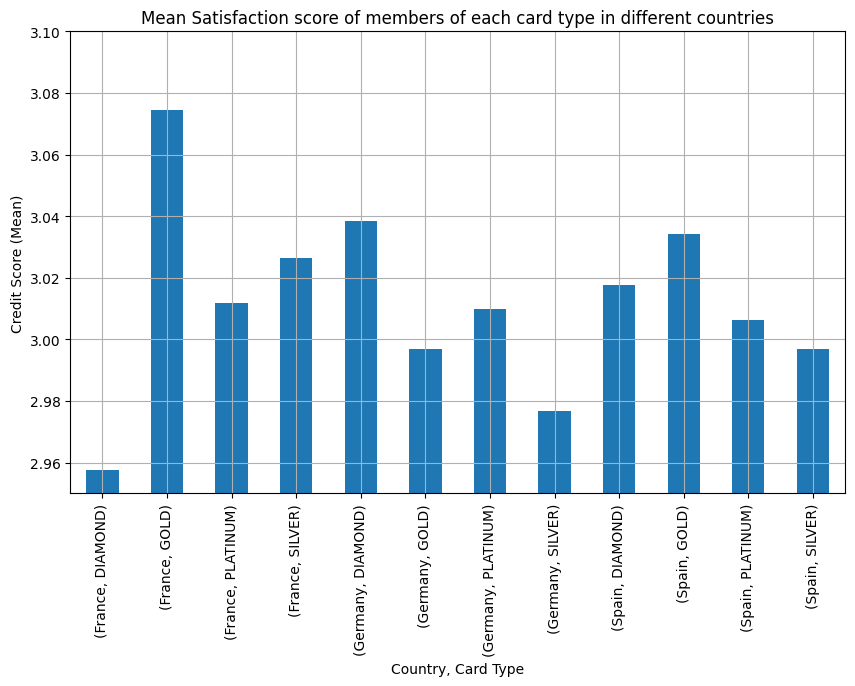

In [25]:
satisfaction_by_country_and_card.plot(kind="bar", figsize=(10, 6))
plt.title("Mean Satisfaction score of members of each card type in different countries")
plt.ylim(2.95, 3.10)
plt.xlabel("Country, Card Type")
plt.ylabel("Credit Score (Mean)")
plt.grid(True)
plt.show()

### From the above plot we can say that the company needs to focus on satisfaction of diamond customers in France and on Silver customers in Germany and Spain

### Number of people having credit cards in different countries

In [26]:
has_crcard_by_country_and_card = df[df['HasCrCard'] == 1].groupby(["Geography"]).size()
print(has_crcard_by_country_and_card)

Geography
France     3543
Germany    1791
Spain      1721
dtype: int64


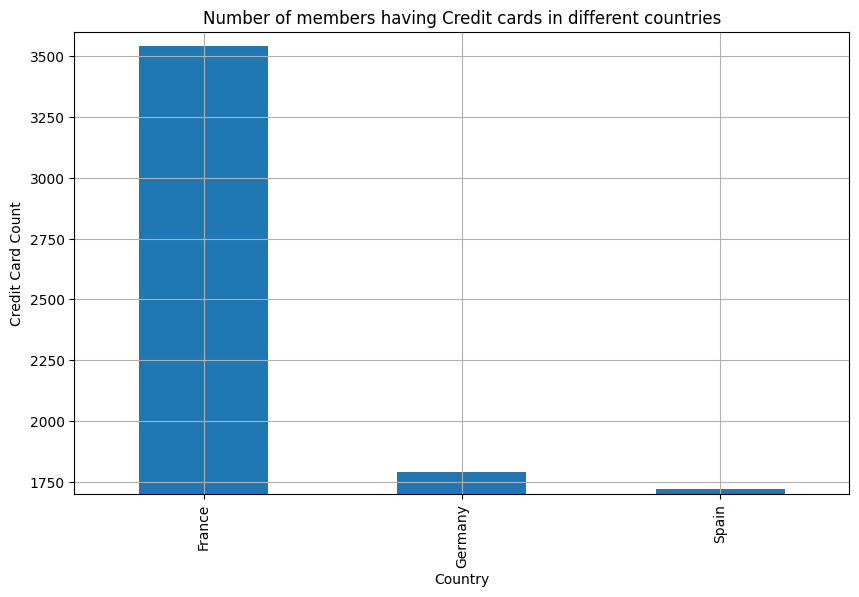

In [27]:
has_crcard_by_country_and_card.plot(kind="bar", figsize=(10, 6))
plt.title("Number of members having Credit cards in different countries")
plt.ylim(1700, 3600)
plt.xlabel("Country")
plt.ylabel("Credit Card Count")
plt.grid(True)
plt.show()

### Estimated salary of people with different carrd types and countries

In [28]:
sal_by_country_and_card = df.groupby(["Geography", "Card Type"])["EstimatedSalary"].mean()
print(sal_by_country_and_card)

Geography  Card Type
France     DIAMOND      100547.843886
           GOLD         100376.280235
           PLATINUM     100814.297769
           SILVER        97919.584553
Germany    DIAMOND      100731.249568
           GOLD         100398.316233
           PLATINUM      99931.121316
           SILVER       103502.561150
Spain      DIAMOND       92299.508808
           GOLD         101064.648257
           PLATINUM      99206.228090
           SILVER       105398.907316
Name: EstimatedSalary, dtype: float64


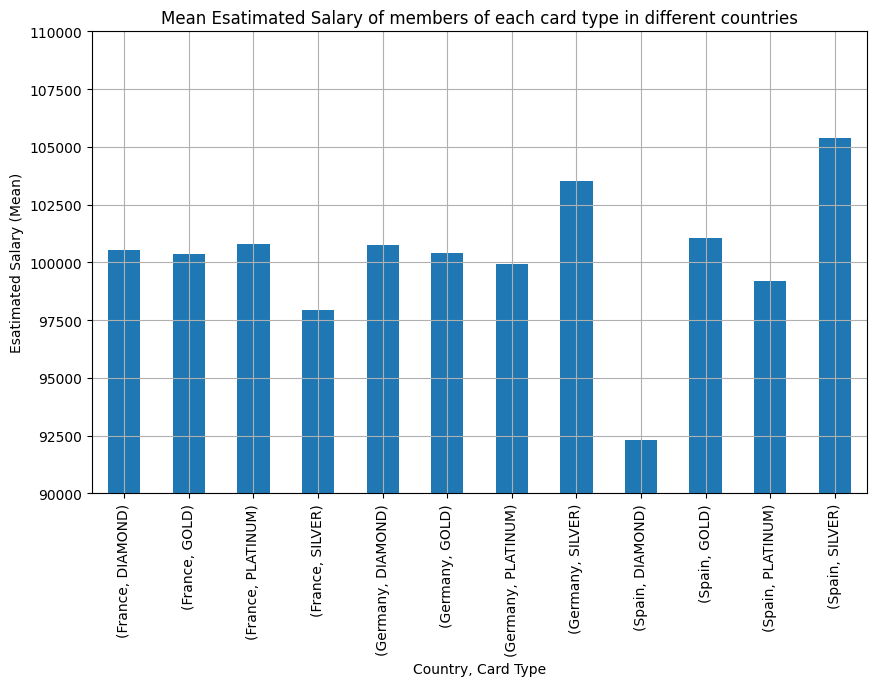

In [29]:
sal_by_country_and_card.plot(kind="bar", figsize=(10, 6))
plt.title("Mean Esatimated Salary of members of each card type in different countries")
plt.ylim(90000, 110000)
plt.xlabel("Country, Card Type")
plt.ylabel("Esatimated Salary (Mean)")
plt.grid(True)
plt.show()

In [30]:
count_by_gen = df.groupby("Gender")['Gender'].count()
print(count_by_gen)

Gender
Female    4543
Male      5457
Name: Gender, dtype: int64


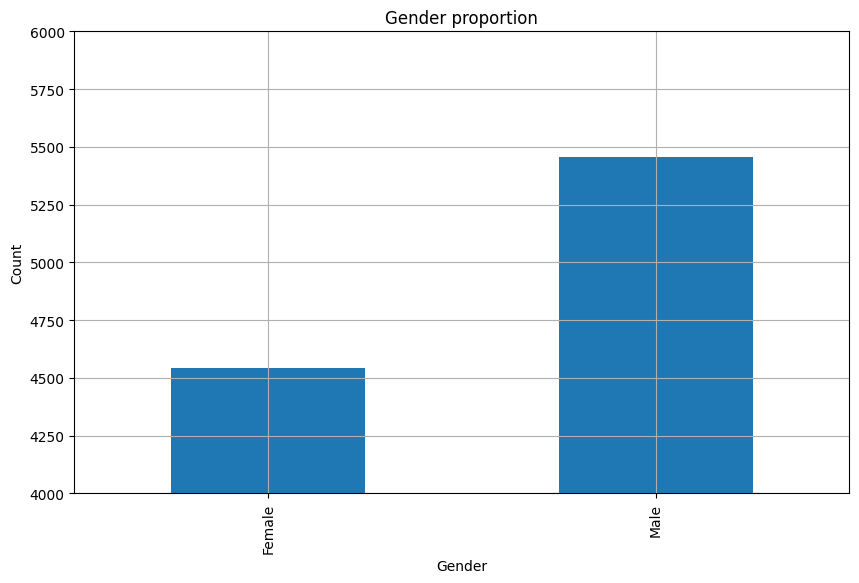

In [31]:
count_by_gen.plot(kind="bar", figsize=(10, 6))
plt.title("Gender proportion")
plt.ylim(4000, 6000)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.grid(True)
plt.show()

### Avg salary in different countries by gender

In [32]:
sal_by_country_gen = df.groupby(["Geography", "Gender"])["EstimatedSalary"].mean()
print(sal_by_country_gen)

Geography  Gender
France     Female     99564.252755
           Male      100174.252495
Germany    Female    102446.424124
           Male       99905.033959
Spain      Female    100734.107475
           Male       98425.687680
Name: EstimatedSalary, dtype: float64


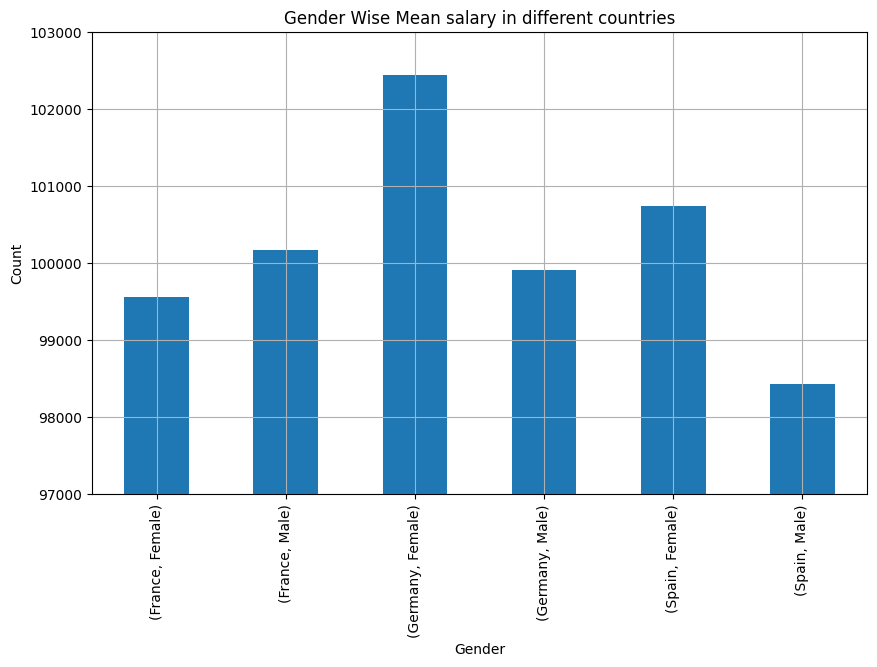

In [33]:
sal_by_country_gen.plot(kind="bar", figsize=(10, 6))
plt.title("Gender Wise Mean salary in different countries")
plt.ylim(97000, 103000)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.grid(True)
plt.show()

### Count of members of different genders in different countries

In [34]:
gen_count_by_country = df.groupby(["Geography", "Gender"])["Gender"].count()
print(gen_count_by_country)

Geography  Gender
France     Female    2261
           Male      2753
Germany    Female    1193
           Male      1316
Spain      Female    1089
           Male      1388
Name: Gender, dtype: int64


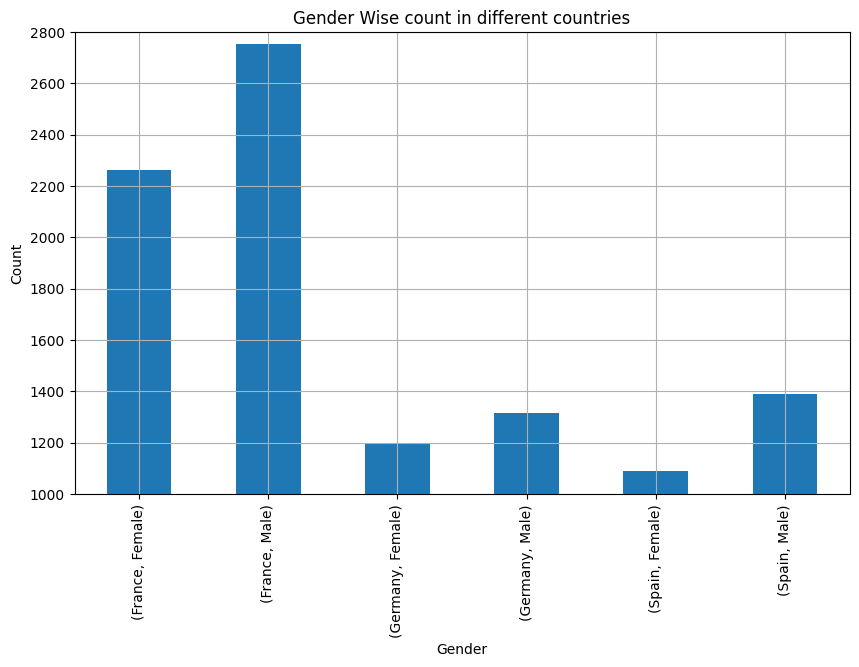

In [35]:
gen_count_by_country.plot(kind="bar", figsize=(10, 6))
plt.title("Gender Wise count in different countries")
plt.ylim(1000, 2800)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.grid(True)
plt.show()

### Combining the above 2 plots

In [36]:
sal_gen_by_country = pd.merge(sal_by_country_gen, gen_count_by_country, left_index=True, right_index=True)
print(sal_gen_by_country)

                  EstimatedSalary  Gender
Geography Gender                         
France    Female     99564.252755    2261
          Male      100174.252495    2753
Germany   Female    102446.424124    1193
          Male       99905.033959    1316
Spain     Female    100734.107475    1089
          Male       98425.687680    1388


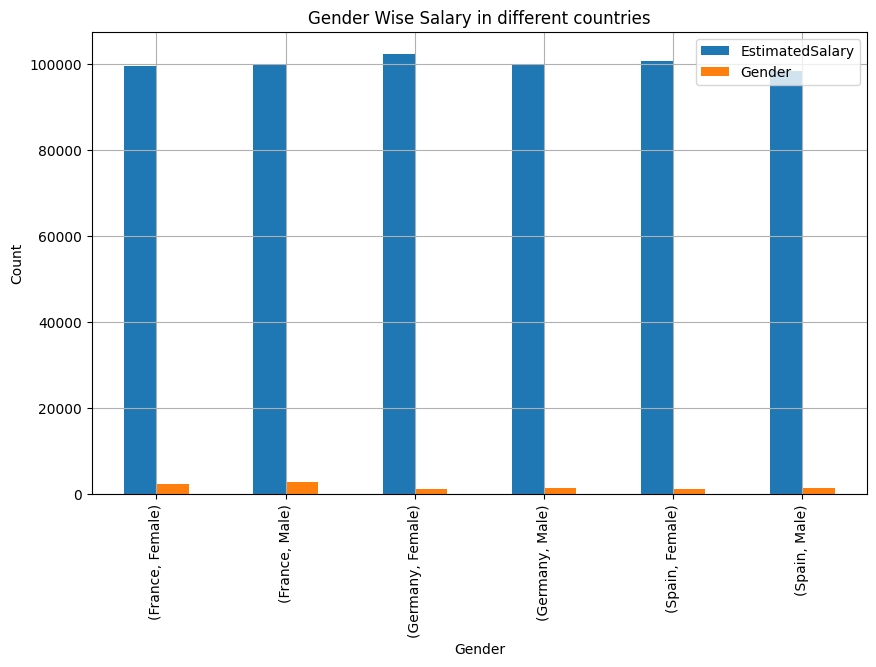

In [37]:
sal_gen_by_country.plot(y=["EstimatedSalary", "Gender"], kind="bar", figsize=(10, 6))
plt.title("Gender Wise Salary in different countries")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.grid(True)
plt.show()

### From the above graph, we can conclude that there exists a pay disparity in Germany and Spain where Females are paid more than males.
Suppporting argument: Even With lower count/population, avg estimated salary of females is greater than males.

## ENOUGH EDA
#### Move on Already...

# Moving to Modelling
### First step is encoding the categorical values

In [38]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import pickle

In [39]:
le = LabelEncoder()

In [40]:
le.fit(df['Geography'])
le_geography_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_geography_mapping)
df['Geography'] = le.transform(df['Geography'])

{'France': 0, 'Germany': 1, 'Spain': 2}


In [41]:
le.fit(df['Gender'])
le_gender_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_gender_mapping)
df['Gender'] = le.transform(df['Gender'])

{'Female': 0, 'Male': 1}


In [42]:
le.fit(df['Card Type'])
le_ctype_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_ctype_mapping)
df['Card Type'] = le.transform(df['Card Type'])

{'DIAMOND': 0, 'GOLD': 1, 'PLATINUM': 2, 'SILVER': 3}


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Geography           10000 non-null  int32  
 2   Gender              10000 non-null  int32  
 3   Age                 10000 non-null  int64  
 4   Tenure              10000 non-null  int64  
 5   Balance             10000 non-null  float64
 6   NumOfProducts       10000 non-null  int64  
 7   HasCrCard           10000 non-null  int64  
 8   IsActiveMember      10000 non-null  int64  
 9   EstimatedSalary     10000 non-null  float64
 10  Exited              10000 non-null  int64  
 11  Complain            10000 non-null  int64  
 12  Satisfaction Score  10000 non-null  int64  
 13  Card Type           10000 non-null  int32  
 14  Point Earned        10000 non-null  int64  
dtypes: float64(2), int32(3), int64(10)
memory usage: 1.0 M

In [44]:
mapping_dict = {
    'Geography': le_geography_mapping,
    'Gender': le_gender_mapping,
    'Card Type': le_ctype_mapping
}

In [45]:
file_path = 'encoded_values.pkl'

with open(file_path, 'wb') as file:
    pickle.dump(mapping_dict, file)

### Second step is splitting the dataset

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [47]:
df.head(20)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,0,0,42,2,0.00,1,1,1,101348.88,1,1,2,0,464
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0,1,3,0,456
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1,1,3,0,377
3,699,0,0,39,1,0.00,2,0,0,93826.63,0,0,5,1,350
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0,0,5,1,425
5,645,2,1,44,8,113755.78,2,1,0,149756.71,1,1,5,0,484
6,822,0,1,50,7,0.00,2,1,1,10062.80,0,0,2,3,206
7,376,1,0,29,4,115046.74,4,1,0,119346.88,1,1,2,0,282
8,501,0,1,44,4,142051.07,2,0,1,74940.50,0,0,3,1,251
9,684,0,1,27,2,134603.88,1,1,1,71725.73,0,0,3,1,342


In [48]:
scaler = StandardScaler()

In [49]:
X = df.drop("Exited", axis = 1)
y = df["Exited"]
scaler.fit(X)
X = scaler.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)


In [50]:
import joblib
joblib.dump(scaler, 'scaler.bin', compress=True)

['scaler.bin']

In [51]:
print(X.shape)
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(y.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)
print(X[-5:-1])

(10000, 14)
(7000, 14)
(1500, 14)
(1500, 14)
(10000,)
(7000,)
(1500,)
(1500,)
[[ 1.24648849 -0.90188624  0.91241915  0.00745665 -0.00442596 -1.22584767
   0.80773656  0.64609167 -1.03067011 -0.06641903 -0.50686588 -1.4324447
  -1.33953263 -1.35678055]
 [-1.39193932 -0.90188624  0.91241915 -0.37395771  1.72446358 -0.30637869
  -0.91158349  0.64609167  0.97024255  0.02798812 -0.50686588  1.41281242
   0.44889545  0.72808783]
 [ 0.60498839 -0.90188624 -1.09598752 -0.27860412  0.68712986 -1.22584767
  -0.91158349 -1.54776799  0.97024255 -1.00864308  1.97290849 -0.00981614
   1.34310948 -0.18819191]
 [ 1.25683526  0.30659057  0.91241915  0.29351742 -0.69598177 -0.02260751
   0.80773656  0.64609167 -1.03067011 -0.12523071  1.97290849 -0.72113042
  -0.44531859 -1.18414813]]


### Third step -> Creating and compiling the model

In [52]:
from keras.models import Sequential
from keras.layers import Dense

In [53]:
model = Sequential([
    Dense(8, activation='relu', input_shape=(14,)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [54]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [55]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 120       
                                                                 
 dense_1 (Dense)             (None, 16)                144       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 281
Trainable params: 281
Non-trainable params: 0
_________________________________________________________________


In [56]:
model.fit(X_train, y_train,batch_size=128, epochs=40,validation_data=(X_val, y_val))

Epoch 1/40
55/55 [==============================] - 1s 4ms/step - loss: 0.6440 - accuracy: 0.6486 - val_loss: 0.5781 - val_accuracy: 0.7993
Epoch 2/40
55/55 [==============================] - 0s 3ms/step - loss: 0.5297 - accuracy: 0.8376 - val_loss: 0.4886 - val_accuracy: 0.8513
Epoch 3/40
55/55 [==============================] - 0s 2ms/step - loss: 0.4570 - accuracy: 0.8533 - val_loss: 0.4251 - val_accuracy: 0.8560
Epoch 4/40
55/55 [==============================] - 0s 2ms/step - loss: 0.4015 - accuracy: 0.8641 - val_loss: 0.3722 - val_accuracy: 0.8680
Epoch 5/40
55/55 [==============================] - 0s 2ms/step - loss: 0.3524 - accuracy: 0.8836 - val_loss: 0.3231 - val_accuracy: 0.8927
Epoch 6/40
55/55 [==============================] - 0s 2ms/step - loss: 0.3055 - accuracy: 0.9073 - val_loss: 0.2761 - val_accuracy: 0.9280
Epoch 7/40
55/55 [==============================] - 0s 2ms/step - loss: 0.2602 - accuracy: 0.9296 - val_loss: 0.2316 - val_accuracy: 0.9453
Epoch 8/40
55/55 [==

In [57]:
model.evaluate(X_test, y_test)

47/47 [==============================] - 0s 1ms/step - loss: 0.0127 - accuracy: 0.9980


[0.012667343020439148, 0.9980000257492065]

In [58]:
print(X_train)

[[-0.32622142  1.51506738 -1.09598752 ... -1.4324447  -1.33953263
   0.44479361]
 [-0.0778988   0.30659057 -1.09598752 ... -0.00981614 -0.44531859
   0.88301435]
 [-0.92633441 -0.90188624  0.91241915 ... -0.00981614 -1.33953263
  -1.71089832]
 ...
 [ 0.87400456 -0.90188624 -1.09598752 ...  1.41281242  1.34310948
   0.31642592]
 [ 0.17042381 -0.90188624  0.91241915 ... -0.00981614 -1.33953263
   0.32527886]
 [ 0.48082708  0.30659057  0.91241915 ...  0.70149814 -1.33953263
   0.1437935 ]]


In [59]:
y_pred = model.predict(X_test)

47/47 [==============================] - 0s 869us/step


In [60]:
print(y_pred)

[[0.9938397 ]
 [0.00128455]
 [0.0016857 ]
 ...
 [0.99467826]
 [0.00864156]
 [0.00935316]]


In [61]:
from sklearn.metrics import accuracy_score

In [62]:
y_pred = np.where(y_pred > 0.5, 1, 0)

In [63]:
print(accuracy_score(y_test, y_pred))

0.998


In [64]:
print(np.unique(y_pred))

[0 1]


In [65]:
print(np.count_nonzero((y_pred == 1)))

283


In [66]:
print(np.count_nonzero((y_pred == 0)))

1217


In [67]:
print(np.count_nonzero((y_test == 1)))

284


In [68]:
print(np.count_nonzero((y_test == 0)))

1216


In [69]:
count_exit = df.groupby("Exited")['Exited'].count()
print(count_exit)

Exited
0    7962
1    2038
Name: Exited, dtype: int64


## Another model because why not....

In [70]:
model2 = Sequential([
    Dense(16, activation='relu', input_shape=(14,)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [71]:
model2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [72]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                240       
                                                                 
 dense_4 (Dense)             (None, 16)                272       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 529
Trainable params: 529
Non-trainable params: 0
_________________________________________________________________


In [73]:
model2.fit(X_train, y_train,batch_size=128, epochs=40,validation_data=(X_val, y_val))

Epoch 1/40
55/55 [==============================] - 1s 4ms/step - loss: 0.4788 - accuracy: 0.7906 - val_loss: 0.3636 - val_accuracy: 0.8547
Epoch 2/40
55/55 [==============================] - 0s 2ms/step - loss: 0.2851 - accuracy: 0.9126 - val_loss: 0.1936 - val_accuracy: 0.9620
Epoch 3/40
55/55 [==============================] - 0s 2ms/step - loss: 0.1398 - accuracy: 0.9766 - val_loss: 0.0850 - val_accuracy: 0.9920
Epoch 4/40
55/55 [==============================] - 0s 2ms/step - loss: 0.0630 - accuracy: 0.9937 - val_loss: 0.0400 - val_accuracy: 0.9987
Epoch 5/40
55/55 [==============================] - 0s 2ms/step - loss: 0.0326 - accuracy: 0.9974 - val_loss: 0.0232 - val_accuracy: 0.9987
Epoch 6/40
55/55 [==============================] - 0s 2ms/step - loss: 0.0209 - accuracy: 0.9981 - val_loss: 0.0165 - val_accuracy: 0.9987
Epoch 7/40
55/55 [==============================] - 0s 2ms/step - loss: 0.0158 - accuracy: 0.9984 - val_loss: 0.0134 - val_accuracy: 0.9987
Epoch 8/40
55/55 [==

In [74]:
model2.evaluate(X_test, y_test)

47/47 [==============================] - 0s 981us/step - loss: 0.0124 - accuracy: 0.9987


[0.012389584444463253, 0.9986666440963745]

### Saving both models

In [75]:
pickle.dump(model, open('model_8_16_1.pkl', 'wb'))
pickle.dump(model2, open('model2_16_16_1.pkl', 'wb'))

In [76]:
print(scaler.mean_)

[6.50528800e+02 7.46300000e-01 5.45700000e-01 3.89218000e+01
 5.01280000e+00 7.64858893e+04 1.53020000e+00 7.05500000e-01
 5.15100000e-01 1.00090240e+05 2.04400000e-01 3.01380000e+00
 1.49800000e+00 6.06515100e+02]
